In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, Audio
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # para 3D

dic_class = {0: 'healthy', 1: 'not healthy', 2: 'unknown'}
dic_class_cat = {'healthy': 0, 'not healthy': 1, 'unknown': 2}

datos_generales = pd.read_pickle('./voice-audios/datos_generales.eav')
features = pd.read_pickle('./voice-audios/features.eav')

datos_generales['genero'] = datos_generales['genero'].str.lower().str.strip().map({'m': 0, 'f': 1})

df = pd.merge(datos_generales, features, on='file_name', how='inner')
features_cols = features.columns.drop(['file_name'])  

In [80]:
features_cols


Index(['intensidad_mean', 'intensidad_std', 'pitch_mean', 'pitch_std',
       'pitch_diff', 'Jitter (local) mean', 'Jitter (local) std',
       'Shimmer (local) mean', 'Shimmer (local) std', 'HNR mean', 'HNR std',
       'MFCC_1_mean', 'MFCC_2_mean', 'MFCC_3_mean', 'MFCC_4_mean',
       'MFCC_5_mean', 'MFCC_6_mean', 'MFCC_7_mean', 'MFCC_8_mean',
       'MFCC_9_mean', 'MFCC_10_mean', 'MFCC_11_mean', 'MFCC_12_mean',
       'MFCC_13_mean', 'Formant1_freq', 'Formant1_bw', 'Formant2_freq',
       'Formant2_bw', 'Formant3_freq', 'Formant3_bw'],
      dtype='object')

In [81]:
def reproducir_clase(clase, X, y):
    if dic_class_cat[clase] not in dic_class_cat.values():
        print(f"Clase {clase} no válida. Debe ser 0 (healthy), 1 (not healthy) o 2 (unknown).")
        return
    indices = [i for i, c in enumerate(y) if c == dic_class_cat[clase]]
    if not indices:
        print(f"No se encontraron muestras para la clase {dic_class_cat[clase]}.")
    else:
        audio = np.concatenate([X.iloc[i]['waveform'] for i in indices[:15]])
        display(Audio(audio, rate=int(X.iloc[0]['sample_rate']), normalize=True))
        plt.figure(figsize=(10, 3))
        plt.plot(audio, linewidth=0.8)
        plt.title(f"Señal de voz - Clase {clase}")
        plt.ylabel("Amplitud")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def reproducir_clase(clase, X, y, cantidad=5):
    if clase not in dic_class_cat:
        print(f"Clase '{clase}' no válida. Debe ser una de: {list(dic_class_cat.keys())}")
        return
    indices = [i for i, c in enumerate(y) if c == dic_class_cat[clase]]

    if not indices:
        print(f"No se encontraron muestras para la clase '{clase}'.")
        return

    print(f"Mostrando hasta {cantidad} ejemplos de la clase '{clase}':")
    for idx in indices[:cantidad]:
        audio = X.iloc[idx]['waveform']
        sr = int(X.iloc[idx]['sample_rate'])

        display(Audio(audio, rate=sr, normalize=True))

        plt.figure(figsize=(10, 2.5))
        plt.plot(audio, linewidth=0.8)
        plt.title(f"{clase.upper()} - Ejemplo #{idx}")
        plt.ylabel("Amplitud")
        plt.xlabel("Tiempo (muestras)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [82]:
y_clases_binaria = datos_generales['clase']

# Reproducir clase saludable 
#reproducir_clase('healthy', datos_generales, y_clases_binaria)  

# Reproducir clase no saludable
#reproducir_clase('not healthy', datos_generales, y_clases_binaria)

In [6]:
# Reproducir clase saludable 
#reproducir_clase('healthy', datos_generales, y_clases_binaria)

# Reproducir clase no saludable
#reproducir_clase('not healthy', datos_generales, y_clases_binaria)


In [83]:
def boxplots(atributo):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x='clase', y=atributo)
    plt.title(f'Distribución de {atributo} por clase')
    plt.show()


def corr():
    corr = df[features_cols.tolist() + ['clase']].corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title('Matriz de correlación')
    plt.show()


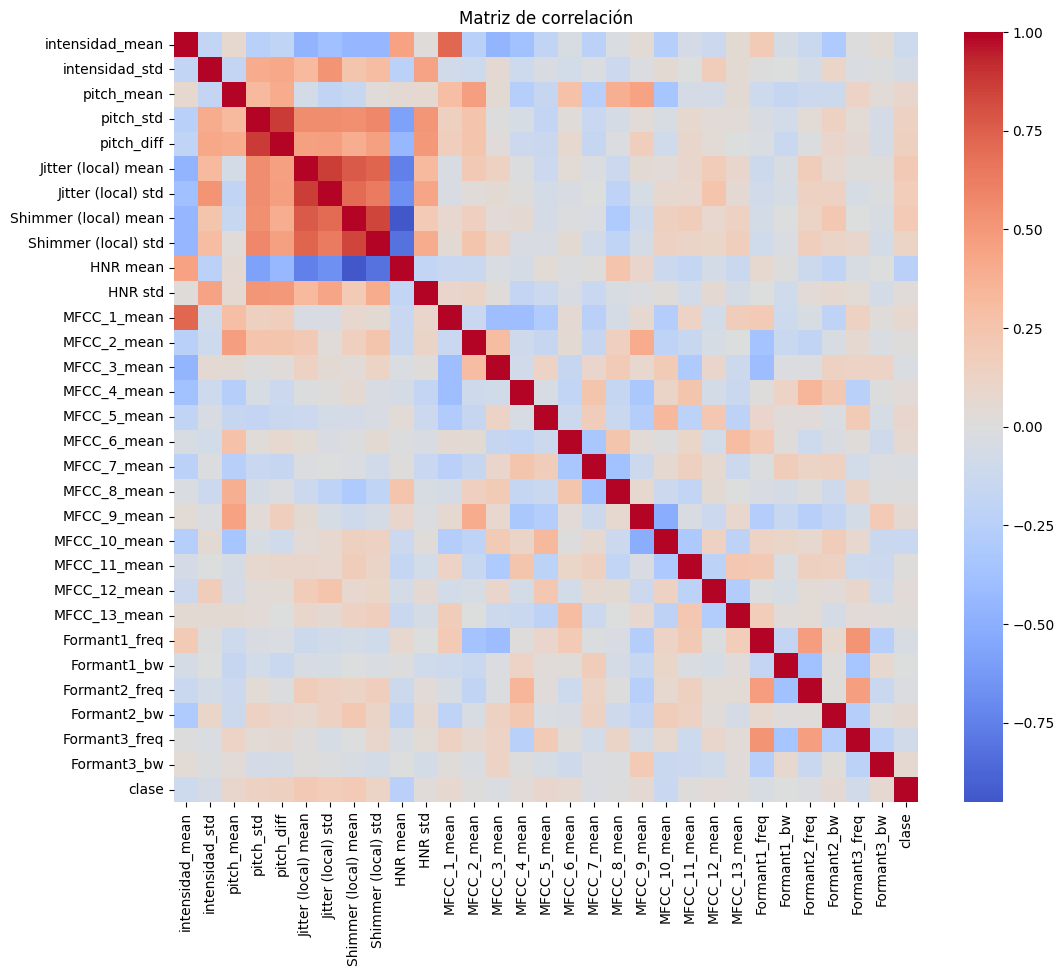

In [84]:
corr()

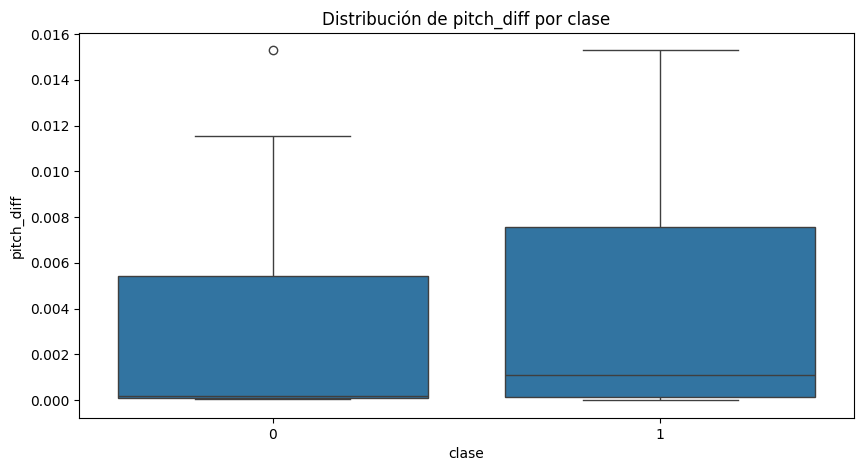

In [86]:
boxplots('pitch_diff')

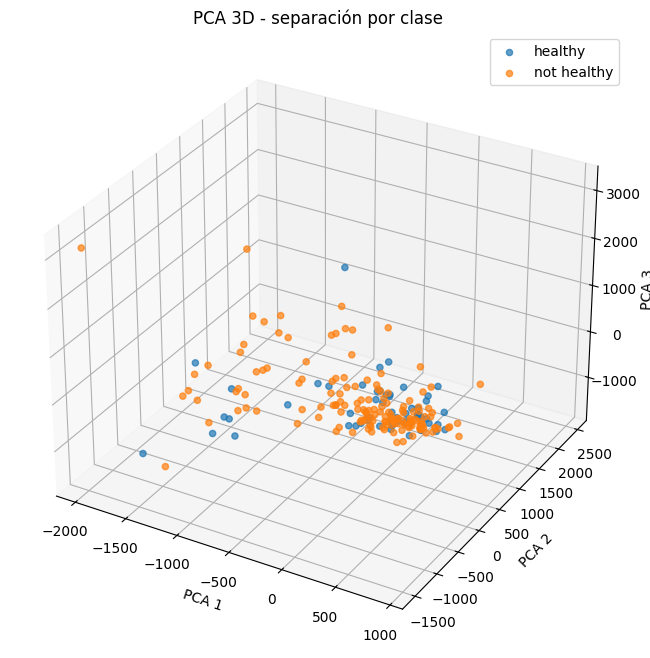

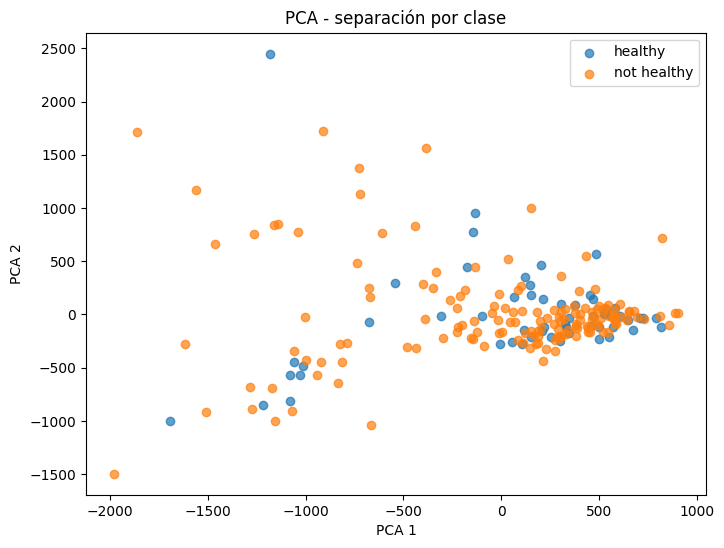

In [43]:
X = df[features_cols].values
y = df['clase'].values

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for clase in np.unique(y):
    idx = y == clase
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2], label=dic_class[clase], alpha=0.7)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend()
ax.set_title('PCA 3D - separación por clase')

plt.show()


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
for clase in np.unique(y):
    idx = y == clase
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=dic_class[clase], alpha=0.7)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.title('PCA - separación por clase')
plt.show()